**Actividad 3 - Modelos de Predicción con Aprendizaje de Máquinas**



*   Davinson Montoya Ramírez
*   Jessica Rivera
*   Luis Felipe Arevalo Cortes



**Planteamiento del Problema**

El Análisis Predictivo hace uso de herramientas informáticas donde se
detectan patrones o tendencias en los datos analizados, y permiten construir a partir de los
mismos reglas susceptibles de ser utilizadas para modelar predicciones.
El objetivo de este trabajo es identificar un modelo de machine learning para la predicción del precio de viviendas en Taiwan. 

In [ ]:
#Importación de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
#Lectura de la base de datos
df = pd.read_csv('real_estate_valuation_dataset.csv',sep=";", delimiter=";", decimal=",", error_bad_lines=False)

**Definición de Variables**

Las variables con las cuales se va a trabajar son las siguientes:

* X1: fecha de la transacción (por ejemplo 2013.250=2013 Marzo, * 2013.500=2013 
Junio, etc.)
* X2: edad de la casa en años
* X3: distancial al MRT (transporte masivo) más cercano en metros
* X4: número de tiendas de conveniencia en el vecindario (entero)
* X5: latitud (unidad: grados)
* X6: longitude (unidad: grados)
* Y: precio por unidad de área (10000 Nuevos dólares taiwaneses/ 3.3 m2)

In [ ]:
#Selección de columnas a trabajar
df = df[['X1','X2','X3','X4','X5','X6','Y']]

In [ ]:
#Encabezado de la Base de Datos
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


La dimensión de la base de datos se comprende el 414 filas y 7 columnas, donde las primeras 6 corresponden a las variables independientes y la última es la variable dependiente

In [ ]:
#Tamaño de la base de datos
df.shape

(414, 7)

In [ ]:
#Estadísticos principales
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


De la variable X1 inicialmente representa la fecha de la transacción. Encontramos que la fecha más antigua de venta de casas, fue en el segundo semestre de 2012. El 50% significa que como máximo la mitad de las casas fueron vendidas hasta Febrero de 2013. La casa más reciente fue vendida en julio de 2013. Para X2 en promedio la edad de las casas es de 17.7 años, sin embargo puede estar 11 años por encima u 11 años por debajo de ese valor. Para X3 el 50% de las casas están como máximo a 492.23 metros de la estación de transporte masivo más cercana. En X4 Encontramos que hay casas ubicadas en vecindarios donde no hay tiendas, pero también hay otras casas en vecindarios con hasta 10 tiendas. En X5 el promedio de la latitud es 24.969030 y en X6 el promedio de la longitud es 121.5333. En Y, el precio promedio por unidad de area de las viviendas es 37.98 (10000 Nuevos dólares taiwaneses/ 3.3 m2).

In [ ]:
#Matriz de Correlación
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Evaluando las correlaciones entre todas las variables, la variable X1 tiene correlaciones frente a las otras variables muy cercanas a cero, por lo que no encontramos correlación lineal entre la varaible X1 y el resto de las variables.

En el siguiente gráfico evidenciamos como se comporta cada una de las variables con las otras, y evidenciamos que X1 no tiene correlación lineal frente  a las otras.

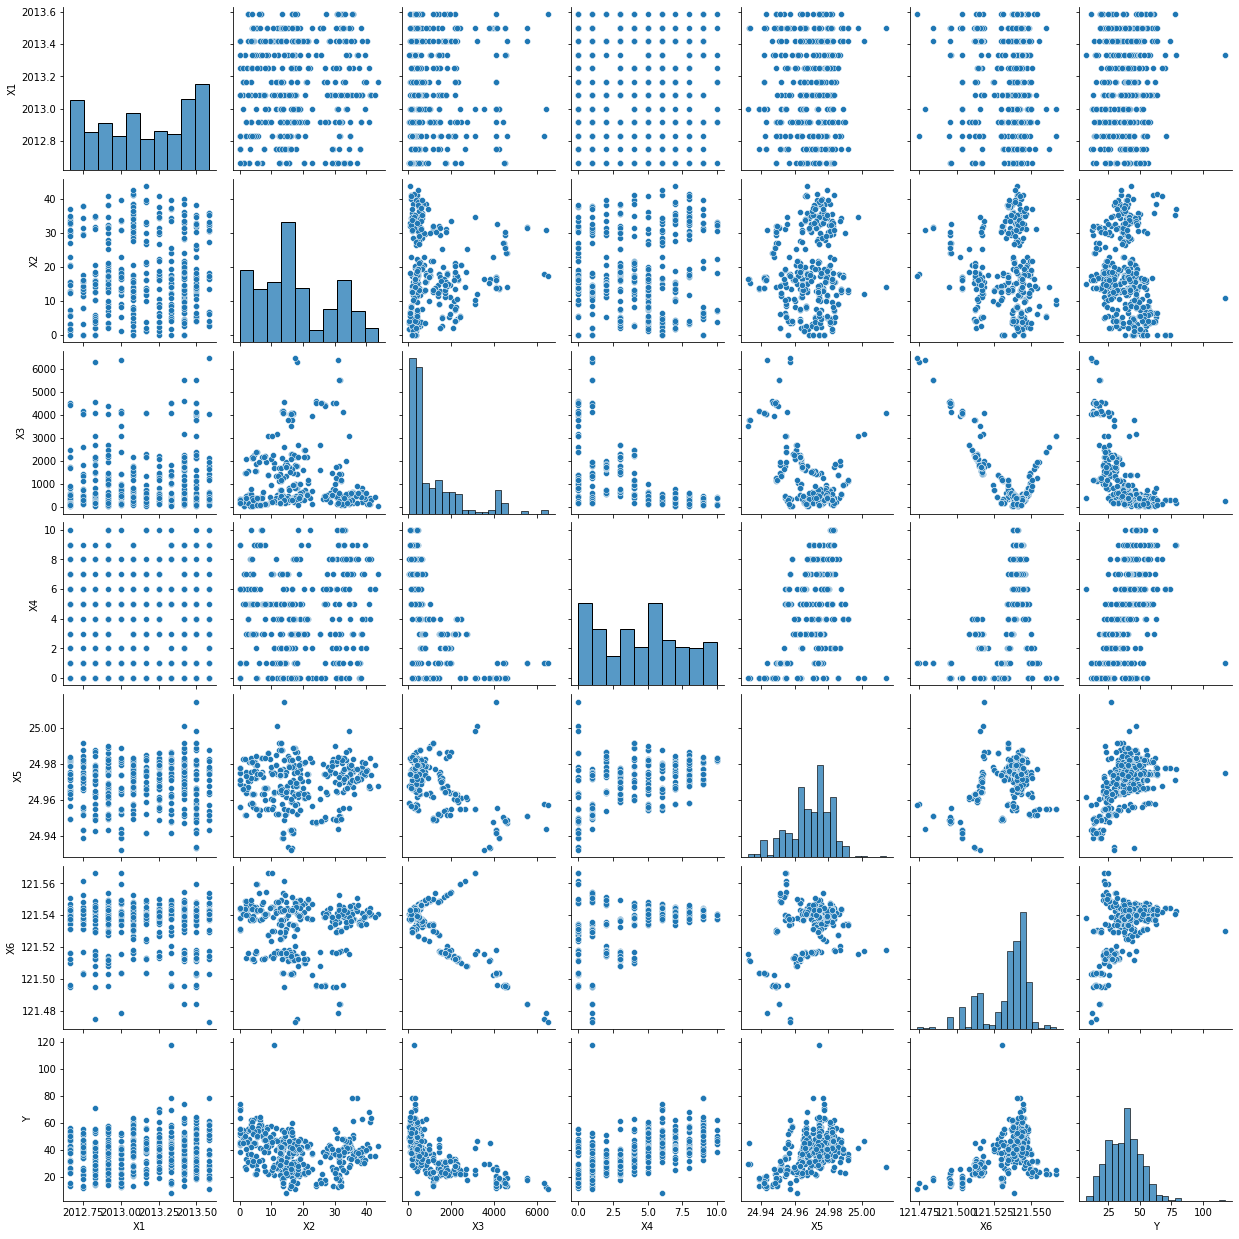

In [ ]:
#Gráfico de dispersión
sns.pairplot(df)

In [ ]:
#Correlación de cada variable respecto a Y
abs(df.corr())['Y'].sort_values(ascending=False)

Y     1.000000
X3    0.673613
X4    0.571005
X5    0.546307
X6    0.523287
X2    0.210567
X1    0.087491
Name: Y, dtype: float64

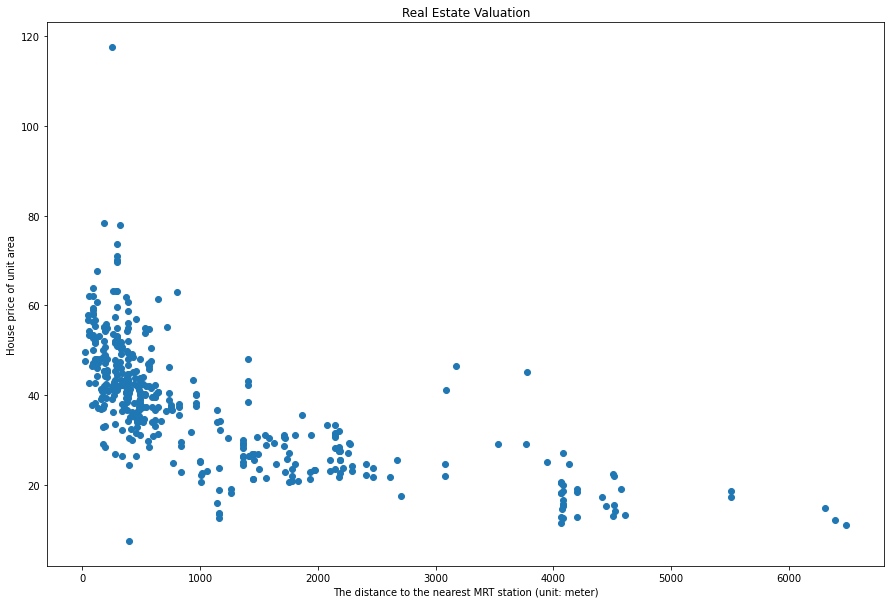

In [ ]:
#Gráfico de X3 vs Y
plt.figure(figsize=(15,10))
plt.scatter(x=df['X3'], y=df['Y'])
plt.xlabel('Distancia a la estación de transporte masivo más cercana (metros)')
plt.ylabel('Precio de la vivienda por und de área')
plt.title('Relación entre X3 y Y')
plt.show()

A medida que la distancia en metros a la estación más cercana de transporte masivo es menor, el precio de las casas aumenta, y observamos que las casas con distancias más grandes a estaciones de transporte masivo más cercanas tienen precios por unidad de area por debajo de 20 (10000 Nuevos dólares taiwaneses/ 3.3 m2).

**Implementación de Modelos**
 

*   Se realizarán experimentos con los metodos de regresión lineal, random forest, XGbost, redes neuronales y maquinas de soporte vectorial. Posterior a los experimentos seleccionaremos el modelo con mejores resultados para a predicción de la variable Y. 



Se define un arreglo matricial para el conjunto de valores en las variables independientes y la variable dependiente. Se separa cada conjunto en las variables X y Y respectivamente.

In [ ]:
datax = df[['X1','X2','X3','X4','X5','X6']]
X = np.array(datax)
y = np.array(df['Y'])

Definimos los datos de entrenamiento y validación. Separamos el conjunto de datos en 80% para entrenamiento y 20% para testeo

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

y_train = y_train.reshape(len(y_train),)
y_valid = y_valid.reshape(len(y_valid),)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((331, 6), (83, 6), (331,), (83,))

Se estandarizan los datos para el conjunto de variables independientes, tanto en el conjunto de entrenamiento como en el de validación.

In [ ]:
#Estandarizacion de los datos
from sklearn.preprocessing import StandardScaler
# Standardisation replaces the values by their Z scores.

# Initialise the Scaler 
scaler = StandardScaler() 

# To scale data 
X_train_Scaled = scaler.fit_transform(X_train) 
# y_train_Scaled = scaler.fit_transform(y_train) 

X_valid_Scaled = scaler.transform(X_valid) 
# y_valid_Scaled = scaler.transform(y_valid) 

Se observan algunos registros de las variables iniciales y las variables escaladas.

In [ ]:
X[1]

array([2012.917  ,   19.5    ,  306.5947 ,    9.     ,   24.98034,
        121.53951])

In [ ]:
X_train_Scaled[1]

array([-0.50924473, -0.06309542, -0.0924274 , -0.02050278,  1.57104465,
        0.05998065])

In [ ]:
y[1]

42.2

In [ ]:
len(X), len(y)

(414, 414)

In [ ]:
X_train[1:3]

array([[2.0130000e+03, 1.6900000e+01, 9.6740000e+02, 4.0000000e+00,
        2.4988720e+01, 1.2153408e+02],
       [2.0130000e+03, 1.2900000e+01, 1.8748230e+02, 1.0000000e+00,
        2.4973880e+01, 1.2152981e+02]])

In [ ]:
y_train[1:3]

array([40.3, 33.1])

**Regresión Lineal Clásica**

Se define la regresión y realiza el entrenamiento del modelo

In [ ]:
lr = LinearRegression()
lr.fit(X_train_Scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Validación de errores en el modelo.

In [ ]:
predictionsLR = lr.predict(X_valid_Scaled)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_valid, y_pred = predictionsLR)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 75.40551025895351
Raíz del Error Cuadrático Medio (RMSE) = 8.683634622607835


In [ ]:
#MAE
print("Intercept: {:,.3f}".format(lr.intercept_))
print("Coefficient: {:,.3f}".format(lr.coef_[0]))
mae = mean_absolute_error(y_valid, lr.predict(X_valid_Scaled))
print("MAE = {:,.2f}".format(mae))


Intercept: 38.004
Coefficient: 1.305
MAE = 6.31


**Regresión Lineal ElasticNet**

Se define la regresión y realiza el entrenamiento del modelo

In [ ]:
regr = ElasticNet(random_state=0)

In [ ]:
regr.fit(X_train_Scaled, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
regr.predict(X_valid_Scaled)

array([40.37009887, 48.60175666, 44.40027186, 43.69607812, 43.65882174,
       44.10706524, 37.26823799, 40.48821831, 46.15938333, 29.86725383,
       34.02402215, 41.9996695 , 45.38633674, 33.06335692, 42.18559742,
       33.68844078, 45.31161257, 43.17955106, 37.8424989 , 19.9172478 ,
       44.47066017, 39.71844207, 42.7697265 , 41.15974477, 37.83728568,
       41.59378712, 34.13248993, 48.80530953, 20.33773207, 43.80910451,
       33.4203697 , 17.76958215, 46.87233136, 37.04259242, 19.16378962,
       40.46396123, 31.19990601, 44.6655712 , 44.4373732 , 43.80907293,
       42.68228248, 40.81992195, 46.9769911 , 45.41502636, 45.46153832,
       32.29433914, 47.76859928, 35.14097658, 43.20429641, 41.83809283,
       33.42212569, 38.24074313, 34.22828613, 48.60175666, 44.85455386,
       31.75043283, 41.50128649, 43.24757623, 15.41037444, 42.6746025 ,
       38.85253915, 30.56533834, 39.04428174, 43.5203617 , 20.30594519,
       40.72105626, 44.35968716, 17.39277912, 42.17880209, 33.51

Validación de errores en el modelo.

In [ ]:
predictionsEN = regr.predict(X_valid_Scaled)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse1 = mean_squared_error(y_true = y_valid, y_pred = predictionsEN)
# La raíz cuadrada del MSE es el RMSE
rmse1 = np.sqrt(mse1)
print('Error Cuadrático Medio (MSE) = ' + str(mse1))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse1))

Error Cuadrático Medio (MSE) = 84.50798588203511
Raíz del Error Cuadrático Medio (RMSE) = 9.19282251988121


In [ ]:
#MAE
print("Intercept: {:,.3f}".format(regr.intercept_))
print("Coefficient: {:,.3f}".format(regr.coef_[0]))
mae1 = mean_absolute_error(y_valid, regr.predict(X_valid_Scaled))
print("MAE = {:,.2f}".format(mae1))

Intercept: 38.004
Coefficient: 0.345
MAE = 6.99


**Random Forest**

Se define la regresión y realiza el entrenamiento del modelo

In [ ]:
rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train_Scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rfr.predict(X_valid_Scaled)

array([40.89868117, 50.98711193, 44.80267091, 43.33657702, 44.69744363,
       47.08312219, 35.93117869, 50.98711193, 50.98711193, 25.53931161,
       25.93116619, 43.4390143 , 50.98711193, 25.12985732, 41.11285462,
       25.12985732, 40.89868117, 50.98711193, 40.89868117, 20.73452961,
       50.98711193, 40.38179854, 32.48540566, 41.11285462, 43.4390143 ,
       34.26464292, 40.89868117, 48.70798221, 20.85364839, 43.53533092,
       25.12985732, 20.73452961, 50.98711193, 27.00027383, 20.73452961,
       40.89868117, 24.84009994, 44.80267091, 44.80267091, 40.89868117,
       40.74633267, 44.80267091, 50.98711193, 40.89868117, 49.52101804,
       24.73800274, 50.98711193, 40.89868117, 44.80267091, 42.22957647,
       25.33345534, 43.4390143 , 24.30246686, 50.98711193, 40.89868117,
       25.02127667, 40.74633267, 44.80267091, 21.15377025, 44.80267091,
       44.80267091, 25.53931161, 43.33657702, 45.58545484, 23.17299192,
       40.89868117, 40.89868117, 20.73452961, 34.26464292, 25.12

Validación de errores

In [ ]:
predictionsRFR = rfr.predict(X_valid_Scaled)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse2 = mean_squared_error(y_true = y_valid, y_pred = predictionsRFR)
# La raíz cuadrada del MSE es el RMSE
rmse2 = np.sqrt(mse2)
print('Error Cuadrático Medio (MSE) = ' + str(mse2))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse2))

Error Cuadrático Medio (MSE) = 62.660464243942116
Raíz del Error Cuadrático Medio (RMSE) = 7.915836294665405


In [ ]:
#MAE
mae2 = mean_absolute_error(y_valid, rfr.predict(X_valid_Scaled))
print("MAE = {:,.2f}".format(mae2))

MAE = 5.59


**XGboost**

Se define la regresión y realiza el entrenamiento del modelo

In [ ]:
GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_train_Scaled, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
GBR.predict(X_valid_Scaled)

array([37.77796139, 55.38731965, 47.05259204, 44.60122331, 45.67883988,
       52.38980379, 29.62875837, 53.09558094, 57.32114008, 22.84589952,
       30.48928914, 40.21452918, 47.19901074, 25.54179686, 35.76797324,
       26.09617319, 43.60974515, 53.23003392, 32.80309227, 16.76333361,
       48.490608  , 34.94758968, 35.9121612 , 34.76116843, 42.28673206,
       35.9966561 , 36.78694584, 48.14531875, 19.46745999, 54.6556659 ,
       25.77443087, 17.37112071, 68.14511033, 27.68350289, 16.76333361,
       38.7328855 , 24.20205372, 48.81665208, 48.73771918, 37.83775381,
       45.55725833, 48.43575858, 68.60139608, 44.03762461, 54.4994974 ,
       22.73832117, 54.40431067, 34.86654046, 44.92270708, 35.77539827,
       26.35375974, 41.45499168, 26.36867595, 55.38731965, 38.19518343,
       24.28953247, 40.60099632, 49.88212758, 17.97188385, 49.00441103,
       41.20105269, 25.41075307, 34.51883576, 45.03676889, 40.7435433 ,
       40.88447652, 38.77758606, 17.37112071, 36.58762138, 25.77

Validación de errores

In [ ]:
predictionsGBR = GBR.predict(X_valid_Scaled)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse3 = mean_squared_error(y_true = y_valid, y_pred = predictionsGBR)
# La raíz cuadrada del MSE es el RMSE
rmse3 = np.sqrt(mse3)
print('Error Cuadrático Medio (MSE) = ' + str(mse3))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse3))

Error Cuadrático Medio (MSE) = 49.90996483413908
Raíz del Error Cuadrático Medio (RMSE) = 7.064698495628747


In [ ]:
#MAE
mae3 = mean_absolute_error(y_valid, GBR.predict(X_valid_Scaled))
print("MAE = {:,.2f}".format(mae3))

MAE = 4.50


**SVR**

Se define la regresión y realiza el entrenamiento del modelo

In [ ]:
eps = 8
l_svr = LinearSVR(epsilon=eps, C=2.4565306122448978, fit_intercept=True)

In [ ]:
l_svr.fit(X_train_Scaled, y_train)


LinearSVR(C=2.4565306122448978, dual=True, epsilon=8, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
l_svr.predict(X_valid_Scaled)

array([40.476753  , 52.70553066, 45.82873982, 44.04164512, 44.28027973,
       47.27704128, 34.07806275, 41.85777704, 49.64267994, 24.69170114,
       35.22717396, 40.58149603, 46.76293083, 29.43785466, 41.66523534,
       31.85170172, 47.87236608, 44.51379554, 36.11080545, 14.81735569,
       47.2326339 , 39.19634158, 44.7764393 , 41.96443012, 35.79850654,
       41.41034571, 28.87988832, 53.17613641, 16.51087002, 43.26363233,
       30.81655568, 10.06021845, 50.63524256, 38.42809184, 13.84386035,
       40.49097675, 30.33153036, 46.42941849, 46.15312151, 43.84601258,
       42.78205239, 39.16225374, 51.01165744, 48.24429983, 47.74020628,
       28.51913135, 49.54333497, 31.46158292, 41.50999708, 42.76560251,
       33.37576143, 38.14027217, 32.10090053, 52.70553066, 46.33205246,
       29.43117134, 40.12885576, 43.59113834,  9.7151762 , 44.35344744,
       36.23121751, 26.83185472, 36.68473226, 43.5672253 , 16.21725066,
       41.43393008, 45.94468345,  9.70983472, 43.58393481, 31.16

Validación de errores

In [ ]:
predictionsl_svr = l_svr.predict(X_valid_Scaled)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse4 = mean_squared_error(y_true = y_valid, y_pred = predictionsl_svr)
# La raíz cuadrada del MSE es el RMSE
rmse4 = np.sqrt(mse4)
print('Error Cuadrático Medio (MSE) = ' + str(mse4))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse4))

Error Cuadrático Medio (MSE) = 76.21428192048262
Raíz del Error Cuadrático Medio (RMSE) = 8.730079147435184


In [ ]:
#MAE
mae4 = mean_absolute_error(y_valid, l_svr.predict(X_valid_Scaled))
print("MAE = {:,.2f}".format(mae4))

MAE = 6.42


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}    
svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=10000)
# svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=100000)
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_absolute_error', cv=5)

In [ ]:
grid_svr.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterati

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=10000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1....
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [ ]:
best_grid_svr_mae = grid_svr.best_estimator_
best_grid_svr_mae.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=2.864285714285714, dual=True, epsilon=2.660408163265306,
          fit_intercept=True, intercept_scaling=1.0, loss='epsilon_insensitive',
          max_iter=10000, random_state=None, tol=0.0001, verbose=0)

C: 2.864285714285714
Epsilon: 2.660408163265306
Intercept: 47.288
Coefficient: -0.010
MAE = 8,020.75
Percentage within Epsilon = 73.49%


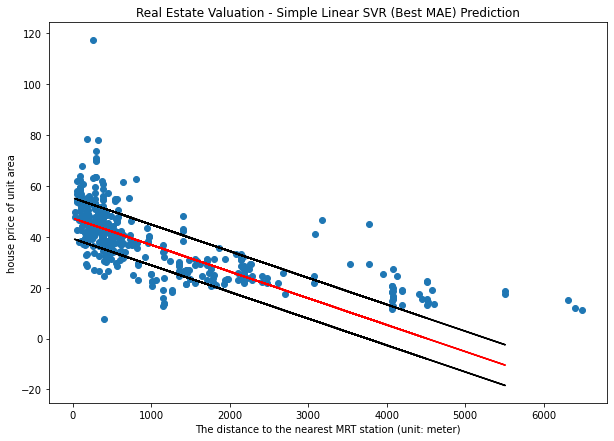

In [ ]:
svr_results(X_valid, y_valid, best_grid_svr_mae, 'Valoración - SVR')

**Red Neuronal**

Se define la regresión y realiza el entrenamiento del modelo

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1,  kernel_initializer='normal'))
 
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['MeanSquaredError'])

model.fit(X_train_Scaled, y_train, epochs=10)

# evaluamos el modelo
scores = model.evaluate(X_train_Scaled, y_train)

Epoch 1/10
11/11 [==============================] - 13s 2ms/step - loss: 1638.8232 - mean_squared_error: 1638.8232
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 1503.2855 - mean_squared_error: 1503.2855
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 1573.1300 - mean_squared_error: 1573.1300
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 1658.9159 - mean_squared_error: 1658.9159
Epoch 5/10
11/11 [==============================] - 0s 1ms/step - loss: 1553.7157 - mean_squared_error: 1553.7157
Epoch 6/10
11/11 [==============================] - 0s 1ms/step - loss: 1573.8672 - mean_squared_error: 1573.8672
Epoch 7/10
11/11 [==============================] - 0s 1ms/step - loss: 1740.6491 - mean_squared_error: 1740.6491
Epoch 8/10
11/11 [==============================] - 0s 1ms/step - loss: 1589.2233 - mean_squared_error: 1589.2233
Epoch 9/10
11/11 [==============================] - 0s 1ms/step - loss: 1548.1412 - mea

Validación de errores

In [ ]:
predictionsrn = model.predict(X_valid_Scaled)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse5 = mean_squared_error(y_true = y_valid, y_pred = predictionsrn)
# La raíz cuadrada del MSE es el RMSE
rmse5 = np.sqrt(mse5)
print('Error Cuadrático Medio (MSE) = ' + str(mse5))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse5))

Error Cuadrático Medio (MSE) = 1573.0212363543699
Raíz del Error Cuadrático Medio (RMSE) = 39.66133175215338


In [ ]:
#MAE
mae5 = mean_absolute_error(y_valid, model.predict(X_valid_Scaled))
print("MAE = {:,.2f}".format(mae5))

MAE = 37.18


**Ajuste únicamente con variable X3**

In [ ]:
X3 = df[['X3']]
X_train_X3, X_valid_X3, y_train_X3, y_valid_X3 = train_test_split(X3, y, test_size=0.2, random_state=99)
y_train_X3 = y_train_X3.reshape(len(y_train_X3),)
y_valid_X3 = y_valid_X3.reshape(len(y_valid_X3),)
X_train_X3.shape, X_valid_X3.shape, y_train_X3.shape, y_valid_X3.shape

((331, 1), (83, 1), (331,), (83,))

Regresión Lineal con X3

In [ ]:
lr = LinearRegression()
lr.fit(X_train_X3, y_train_X3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictionsLR = lr.predict(X_valid_X3)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
x3mse = mean_squared_error(y_true = y_valid_X3, y_pred = predictionsLR)
# La raíz cuadrada del MSE es el RMSE
x3rmse = np.sqrt(x3mse)
print('Error Cuadrático Medio (MSE) = ' + str(x3mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(x3rmse))

Error Cuadrático Medio (MSE) = 98.043151878108
Raíz del Error Cuadrático Medio (RMSE) = 9.901674195715996


In [ ]:
#MAE
print("Intercept: {:,.3f}".format(lr.intercept_))
print("Coefficient: {:,.3f}".format(lr.coef_[0]))
X3mae = mean_absolute_error(y_valid_X3, lr.predict(X_valid_X3))
print("MAE = {:,.2f}".format(X3mae))

Intercept: 45.753
Coefficient: -0.007
MAE = 7.49


XGBoost para X3

In [ ]:
GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_train_X3, y_train_X3)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
predictionsGBR = GBR.predict(X_valid_X3)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
x3mse3 = mean_squared_error(y_true = y_valid_X3, y_pred = predictionsGBR)
# La raíz cuadrada del MSE es el RMSE
x3rmse3 = np.sqrt(x3mse3)
print('Error Cuadrático Medio (MSE) = ' + str(x3mse3))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(x3rmse3))

Error Cuadrático Medio (MSE) = 63.59453830371903
Raíz del Error Cuadrático Medio (RMSE) = 7.974618379817246


In [ ]:
#MAE
x3mae3 = mean_absolute_error(y_valid_X3, GBR.predict(X_valid_X3))
print("MAE = {:,.2f}".format(x3mae3))

MAE = 5.68


**Conclusiones**


Las variables de mayor impacto teniendo en cuenta la correlación de ellas con el precio de la vivienda  son:
* X3 (Distancia a la estación del transporte masivo más cercana) :   0.673613
* X4 (número de tiendas de conveniencia en el vecindario):   0.571005
* X5 ( latitud):   0.546307
* X6 (longitud):   0.523287

Para la selección del mejor modelo, utilizamos el mse, el rmse y el mae. Un resumen de los errores cuadráticos medios de los modelos:

In [ ]:
print("Regresión Lineal Clásica: ",mse, "Regresión Lineal ElasticNet: ", mse1, "Random Forest: ",mse2)
print("XGBoost: ",mse3,"SVR: ", mse4, "Red Neuronal: ",mse5)

Regresión Lineal Clásica:  75.40551025895351 Regresión Lineal ElasticNet:  84.50798588203511 Random Forest:  62.660464243942116
XGBoost:  49.90996483413908 SVR:  76.21428192048262 Red Neuronal:  1573.0212363543699


Error cuadrático medio (RMSE) : RMSE es una regla de puntuación cuadrática que también mide la magnitud media del error. Es la raíz cuadrada del promedio de diferencias cuadradas entre la predicción y la observación real. RMSE tiene la ventaja de penalizar más los errores grandes, por lo que puede ser más apropiado. Se muestra un resumen de los rmse en cada modelo:

In [ ]:
print("Regresión Lineal Clásica: ",rmse, "Regresión Lineal ElasticNet: ", rmse1, "Random Forest: ",rmse2)
print("XGBoost: ",rmse3,"SVR: ", rmse4, "Red Neuronal: ",rmse5)

Regresión Lineal Clásica:  8.683634622607835 Regresión Lineal ElasticNet:  9.19282251988121 Random Forest:  7.915836294665405
XGBoost:  7.064698495628747 SVR:  8.730079147435184 Red Neuronal:  39.66133175215338


Resumen de los mae en cada modelo:

In [ ]:
print("Regresión Lineal Clásica: ",mae, "Regresión Lineal ElasticNet: ", mae1, "Random Forest: ",mae2)
print("XGBoost: ",mae3,"SVR: ", mae4, "Red Neuronal: ",mae5)

Regresión Lineal Clásica:  6.306077518174099 Regresión Lineal ElasticNet:  6.987300992997024 Random Forest:  5.591190004048291
XGBoost:  4.4950460887967765 SVR:  6.41897367605868 Red Neuronal:  37.1814983660198


El mejor modelo usado para resolver el problema es el XGBoost, con un RMSE de 7.06469 y un MAE de 4.5

Las principales ventajas del algoritmo XGBoost son:

Puede manejar grandes bases de datos con múltiples variables.

Puede manejar valores perdidos.

Sus resultados son muy precisos.

Excelente velocidad de ejecución.

Se implementó la regresión lineal con sólo X3 y arrojó un RMSE de 9.90 el cual es peor que el mismo modelo utilizando todas las variables con RMSE 8.68. Se tuvo en cuenta realizar los modelos con la variable X3 (la variable más correlacionada) para el mejor modelo encontrado(XGBoost), se encontró que con sólo la variable X3 arroja un MAE de 5.68 y con todas las variables arroja un MAE de 4.5, y un RMSE de 7.97 frente a un RMSE de 7.07 con todas las variables. También se implementó el SVR con sólo X3 y arrojó un MAE de 8.02 frente a un MAE de 6.41 en el mismo modelo con todas las varaibles. Por lo tanto, se escogió definir todos los modelos con todas las variables del conjunto de datos.